In [14]:
from radargram import Radargram
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [15]:
raw = False

# Load MAT file in v7.3 format using h5py
file_path = (
    "./../../data/raw/radargrams.mat"
    if raw
    else "./../../../GPR_Daten_mat/radargrams.mat"
)

# First, explore the structure of the file
with h5py.File(file_path, "r") as f:
    print("Top-level keys:", list(f.keys()))

    # Explore first level of structure
    for key in f.keys():
        if isinstance(f[key], h5py.Group):
            print(f"{key} (Group): {list(f[key].keys())}")
        else:
            print(f"{key} (Dataset): shape={f[key].shape}, dtype={f[key].dtype}")

    # Load data from the first available key
    first_key = list(f.keys())[0]  # second key

    if isinstance(f[first_key], h5py.Group):
        # If it's a group, look for a dataset inside
        nested_keys = list(f[first_key].keys())
        if nested_keys:
            data_path = f"{first_key}/{nested_keys[30]}"
            print(f"Loading data from: {data_path}")
            data = np.array(
                f[data_path][:]
            ).T  # Transpose to match MATLAB's orientation
    else:
        # If it's directly a dataset
        data = np.array(f[first_key][:]).T
        print(f"Loading data from: {first_key}")

    # Print data shape
    print(f"Data shape: {data.shape}")

# Create Radargram instance
rg = Radargram(data)

height, width = rg.data.shape
ratio = width / height * (9 / 16)

Top-level keys: ['#refs#', 'radargrams']
#refs# (Group): ['A', 'B', 'C', 'D', 'E', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
radargrams (Dataset): shape=(1, 30), dtype=object
Loading data from: #refs#/z
Data shape: (725, 11811)


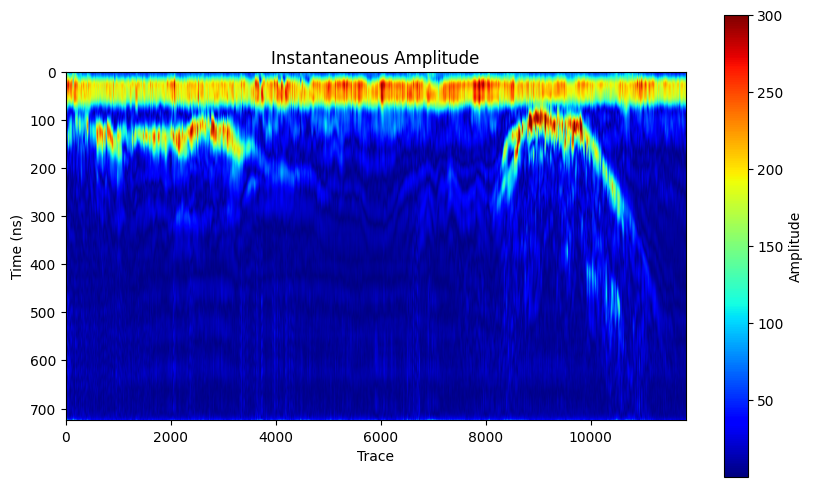

In [17]:
arr = rg.calc_instantaneous_amplitude()
arr = np.clip(arr, 0, 300)

plt.figure(figsize=(10, 6))
plt.title("Instantaneous Amplitude")
plt.xlabel("Trace")
plt.ylabel("Time (ns)")
plt.imshow(arr, cmap="jet", aspect=ratio)
plt.colorbar(label="Amplitude")
plt.show()

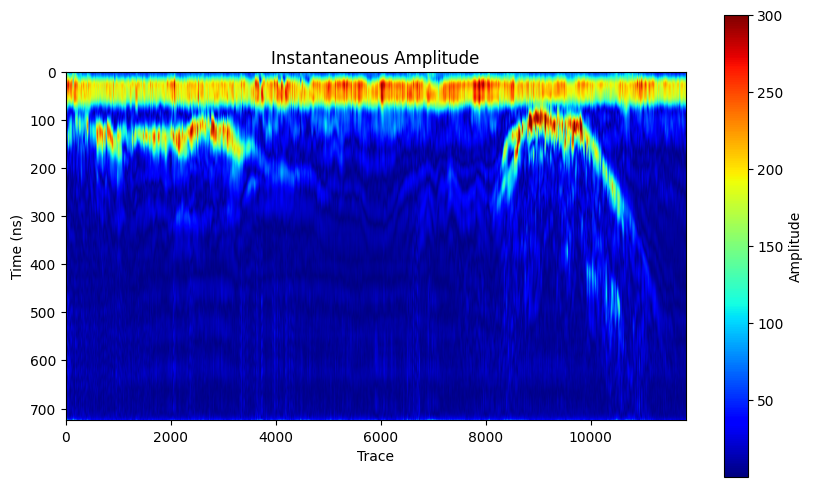

In [ ]:
arr = rg.calc_instantaneous_frequency()
arr = np.clip(arr, 0, 300)

plt.figure(figsize=(10, 6))
plt.title("Instantaneous Frequency")
plt.xlabel("Trace")
plt.ylabel("Time (ns)")
plt.imshow(arr, cmap="jet", aspect=ratio)
plt.colorbar(label="Frequency (Hz)")
plt.show()